In [808]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline,Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [809]:
data=pd.read_csv('Human_Resources.csv')

In [810]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [811]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [812]:
data.drop(labels=['OverTime','Over18'],inplace=True,axis=1)

In [813]:
x=data.drop('Attrition',axis=1)
y=data.loc[:,['Attrition']]

In [814]:
y['Attrition']=y['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

In [815]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


## splitting into train test

In [816]:
from sklearn.model_selection import train_test_split

In [817]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75,random_state=42)

In [818]:
y_train.value_counts()

Attrition
0            913
1            189
dtype: int64

In [819]:
# x_train_dum=pd.get_dummies(x_train,drop_first=True)

## Applying OneHotEncoder

In [820]:
ohe=OneHotEncoder(drop='first',sparse=False)

In [821]:
cat_columns=x_train.select_dtypes(include='object')
cat_columns

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
1343,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single
1121,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1048,Travel_Rarely,Sales,Other,Male,Sales Executive,Single
1393,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single
527,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single
...,...,...,...,...,...,...
1130,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married
1294,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single
860,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
1459,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Married


In [822]:
cat_values=ohe.fit_transform(cat_columns)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [823]:
ca_values=pd.DataFrame(cat_values)

In [824]:
x_train_num=x_train.drop(columns=cat_columns)

In [825]:
x_train_num.shape

(1102, 26)

In [826]:
x_train_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1343,29,592,7,3,1,1883,4,59,3,1,...,2,80,0,11,2,3,3,2,1,2
1121,36,884,1,4,1,1585,2,73,3,2,...,1,80,0,15,5,3,1,0,0,0
1048,34,1326,3,3,1,1478,4,81,1,2,...,4,80,0,15,2,3,13,9,3,12
1393,27,954,9,3,1,1965,4,44,3,2,...,1,80,0,7,5,3,7,7,0,7
527,32,929,10,3,1,722,4,55,3,2,...,4,80,0,10,2,2,10,7,0,8


In [827]:
x_train_concat=np.hstack([x_train_num,ca_values])

In [828]:
x_train_df=pd.DataFrame(x_train_concat)

In [829]:
x_train_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,29.0,592.0,7.0,3.0,1.0,1883.0,4.0,59.0,3.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,36.0,884.0,1.0,4.0,1.0,1585.0,2.0,73.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,34.0,1326.0,3.0,3.0,1.0,1478.0,4.0,81.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,27.0,954.0,9.0,3.0,1.0,1965.0,4.0,44.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32.0,929.0,10.0,3.0,1.0,722.0,4.0,55.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,35.0,750.0,28.0,3.0,1.0,1596.0,2.0,46.0,4.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1098,41.0,447.0,5.0,3.0,1.0,1814.0,2.0,85.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1099,22.0,1256.0,3.0,4.0,1.0,1203.0,3.0,48.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1100,29.0,1378.0,13.0,2.0,1.0,2053.0,4.0,46.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Standard Scaling The X_train

In [830]:
# x_train_df_scale=scaler.fit_transform(x_train_df)

## Using MinMaxScaler 

In [831]:
scaler=MinMaxScaler()

In [832]:
x_train_df_scale=scaler.fit_transform(x_train_df)

In [833]:
x_train_df_scale

array([[0.26190476, 0.35150646, 0.21428571, ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.56097561, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.38095238, 0.87804878, 0.07142857, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.0952381 , 0.82783357, 0.07142857, ..., 0.        , 1.        ,
        0.        ],
       [0.26190476, 0.91535151, 0.42857143, ..., 0.        , 1.        ,
        0.        ],
       [0.76190476, 0.11621234, 0.28571429, ..., 0.        , 1.        ,
        0.        ]])

In [834]:
x_train_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,29.0,592.0,7.0,3.0,1.0,1883.0,4.0,59.0,3.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,36.0,884.0,1.0,4.0,1.0,1585.0,2.0,73.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,34.0,1326.0,3.0,3.0,1.0,1478.0,4.0,81.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,27.0,954.0,9.0,3.0,1.0,1965.0,4.0,44.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32.0,929.0,10.0,3.0,1.0,722.0,4.0,55.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,35.0,750.0,28.0,3.0,1.0,1596.0,2.0,46.0,4.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1098,41.0,447.0,5.0,3.0,1.0,1814.0,2.0,85.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1099,22.0,1256.0,3.0,4.0,1.0,1203.0,3.0,48.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1100,29.0,1378.0,13.0,2.0,1.0,2053.0,4.0,46.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## smote

In [835]:
smt=SMOTE()
x_train_sm,y_train_sm=smt.fit_resample(x_train_df,y_train)

In [836]:
scaler=StandardScaler()

In [837]:
x_train_scale=scaler.fit_transform(x_train_sm)

## Logistic Regression

In [838]:
log_model=LogisticRegression(max_iter=9000)
log_model.fit(x_train_df,y_train)
log_model.score(x_train_df,y_train)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8539019963702359

In [839]:
# x_test_dum=pd.get_dummies(x_test,drop_first=True)

In [840]:
# x_test_scale=scaler.fit_transform(x_test_dum)

In [841]:
test_cat_columns=x_test.select_dtypes(include='object')

In [842]:
test_cat_values=ohe.fit_transform(test_cat_columns)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [843]:
test_cat_values=pd.DataFrame(test_cat_values)

In [844]:
x_test_num=x_test.drop(columns=test_cat_columns)

In [845]:
x_test_num.shape,test_cat_values.shape

((368, 26), (368, 20))

In [846]:
x_test_concat=np.hstack([x_test_num,test_cat_values])

In [847]:
x_test_df=pd.DataFrame(x_test_concat)

In [848]:
x_test_df_scale=scaler.fit_transform(x_test_df)

In [849]:
y_pred_scale=log_model.predict(x_test_df_scale)

In [850]:
print(classification_report(y_test,y_pred_scale))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       320
           1       0.22      0.83      0.35        48

    accuracy                           0.59       368
   macro avg       0.59      0.69      0.52       368
weighted avg       0.86      0.59      0.65       368



In [851]:
c_matrix=confusion_matrix(y_test,y_pred_scale)

<Axes: >

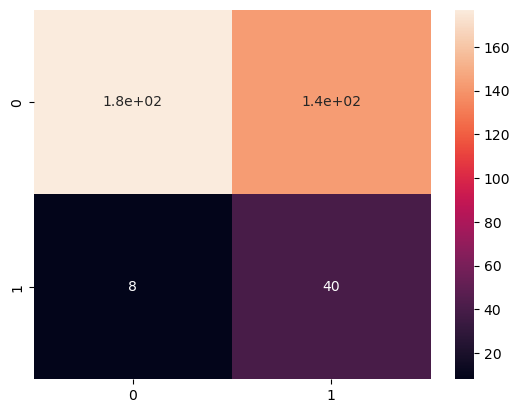

In [852]:
sns.heatmap(c_matrix,annot=True)

In [853]:
# xx

In [854]:
log_model.fit(x_train_df_scale,y_train)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=9000)

In [855]:
y_pred=log_model.predict(x_test_df_scale)

In [856]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69       320
           1       0.21      0.83      0.34        48

    accuracy                           0.58       368
   macro avg       0.58      0.69      0.52       368
weighted avg       0.86      0.58      0.64       368



In [857]:
c_matrix=confusion_matrix(y_test,y_pred)

<Axes: >

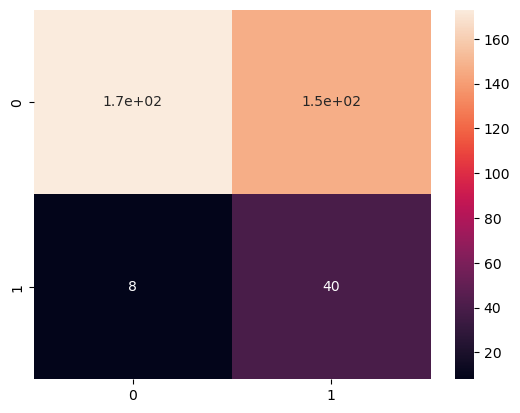

In [858]:
sns.heatmap(c_matrix,annot=True)

## Decesion Tree

In [859]:
decision_model=DecisionTreeClassifier()
decision_model.fit(x_train_df,y_train)

DecisionTreeClassifier()

In [860]:
decision_model.score(x_train_df,y_train)

1.0

In [861]:
x_train.shape,y_train.shape

((1102, 32), (1102, 1))

In [862]:
x_test_df_scale=scaler.fit_transform(x_test_df)

In [863]:
y_pred_scale=log_model.predict(x_test_df_scale)

In [864]:
print(classification_report(y_test,y_pred_scale))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69       320
           1       0.21      0.83      0.34        48

    accuracy                           0.58       368
   macro avg       0.58      0.69      0.52       368
weighted avg       0.86      0.58      0.64       368



In [865]:
c_matrix=confusion_matrix(y_test,y_pred_scale)

<Axes: >

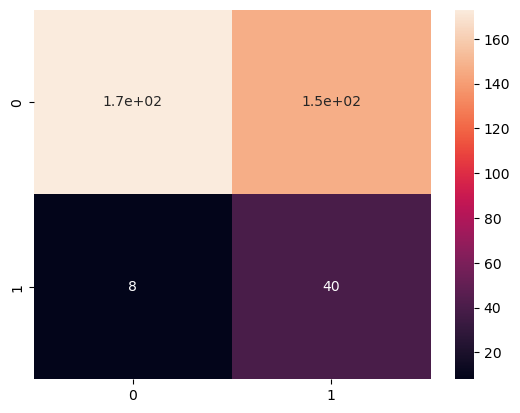

In [866]:
sns.heatmap(c_matrix,annot=True)

In [867]:
# xx

In [868]:
y_pred=log_model.predict(x_test_df)

In [869]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       320
           1       0.13      1.00      0.23        48

    accuracy                           0.14       368
   macro avg       0.57      0.50      0.12       368
weighted avg       0.89      0.14      0.04       368



In [870]:
c_matrix=confusion_matrix(y_test,y_pred)

<Axes: >

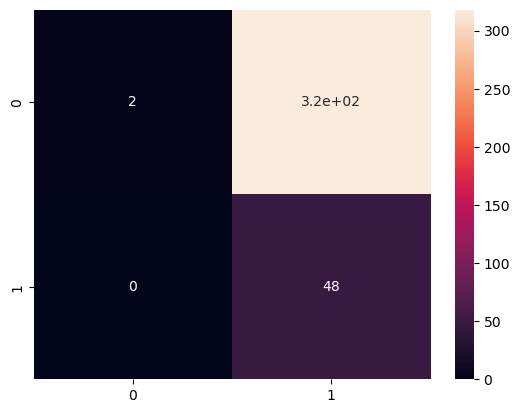

In [871]:
sns.heatmap(c_matrix,annot=True)

## Applying RandomForest Classifier

## Without Scaling

In [872]:
random=RandomForestClassifier()
random.fit(x_train_df,y_train)

C:\Users\ISF\AppData\Local\Temp\ipykernel_16152\554737148.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train_df,y_train)


RandomForestClassifier()

In [873]:
x_train_df.shape,y_train.shape

((1102, 46), (1102, 1))

In [874]:
y_pred=random.predict(x_test_df)

In [875]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.50      0.10      0.17        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.55       368
weighted avg       0.83      0.87      0.83       368



In [876]:
c_matrix=confusion_matrix(y_test,y_pred)

<Axes: >

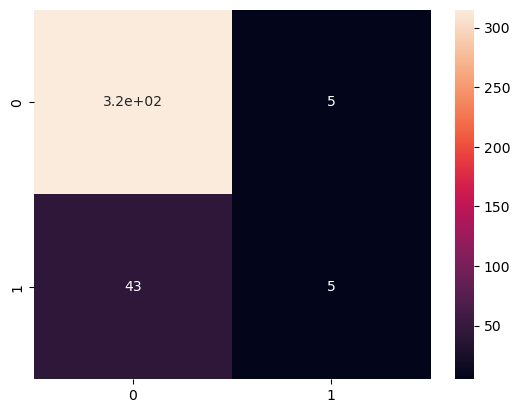

In [877]:
sns.heatmap(c_matrix,annot=True)

## With Scaling

In [878]:
random_scale=RandomForestClassifier()
random_scale.fit(x_train_df_scale,y_train)

C:\Users\ISF\AppData\Local\Temp\ipykernel_16152\628316657.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_scale.fit(x_train_df_scale,y_train)


RandomForestClassifier()

In [879]:
y_pred=random_scale.predict(x_test_df_scale)

In [880]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64       320
           1       0.16      0.62      0.25        48

    accuracy                           0.51       368
   macro avg       0.53      0.56      0.45       368
weighted avg       0.80      0.51      0.59       368



In [881]:
c_matrix=confusion_matrix(y_test,y_pred)

<Axes: >

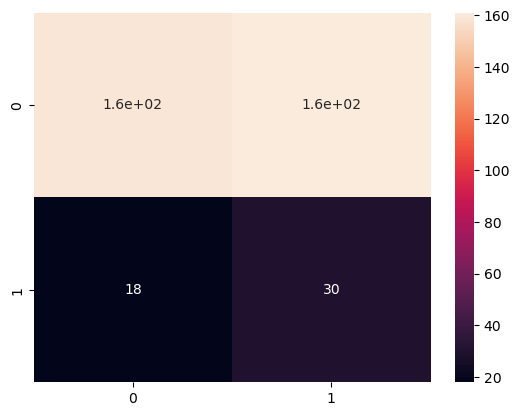

In [882]:
sns.heatmap(c_matrix,annot=True)

## apply to various models 

In [883]:
# !pip install xgboost

In [884]:
scaler=StandardScaler()

In [885]:
models=[]

models.append(('Logistic Regression',Pipeline([('Standard Scaler',scaler),('model',LogisticRegression())])))
models.append(('Descision Tree',Pipeline([('Standard Scaler',scaler),('model',DecisionTreeClassifier())]))) 
models.append(('SVC',Pipeline([('Standard Scaler',scaler),('model',SVC())])))
models.append(('KNeighborsClassifier',Pipeline([('Standard Scaler',scaler),('model',KNeighborsClassifier())])))               

In [886]:
models

[('Logistic Regression',
  Pipeline(steps=[('Standard Scaler', StandardScaler()),
                  ('model', LogisticRegression())])),
 ('Descision Tree',
  Pipeline(steps=[('Standard Scaler', StandardScaler()),
                  ('model', DecisionTreeClassifier())])),
 ('SVC',
  Pipeline(steps=[('Standard Scaler', StandardScaler()), ('model', SVC())])),
 ('KNeighborsClassifier',
  Pipeline(steps=[('Standard Scaler', StandardScaler()),
                  ('model', KNeighborsClassifier())]))]

In [887]:
result=[]

for name ,model in models:
    cv=KFold(n_splits=5,shuffle=True)
    cross_val=cross_val_score(model,x_train_df,y_train,cv=cv,scoring='accuracy')
    result.extend([(name,cross_val)])
    print(f'Model {name}------> Accuracy {cross_val.mean()}')

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Model Logistic Regression------> Accuracy 0.847531879884821
Model Descision Tree------> Accuracy 0.7794816947758123


C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Model SVC------> Accuracy 0.8402920608802962
Model KNeighborsClassifier------> Accuracy 0.8230234471410942


In [888]:
result

[('Logistic Regression',
  array([0.85067873, 0.86425339, 0.85454545, 0.82727273, 0.84090909])),
 ('Descision Tree',
  array([0.79638009, 0.77375566, 0.77727273, 0.75      , 0.8       ])),
 ('SVC', array([0.85520362, 0.82352941, 0.84090909, 0.84090909, 0.84090909])),
 ('KNeighborsClassifier',
  array([0.84162896, 0.83257919, 0.84545455, 0.80909091, 0.78636364]))]

In [889]:
svc=SVC()

In [890]:
svc=svc.fit(x_train_df,y_train)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [891]:
# x_test=pd.get_dummies(x_test_df,drop_first=True)

In [892]:
y_pred=svc.predict(x_test_df)

In [893]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.00      0.00      0.00        48

    accuracy                           0.87       368
   macro avg       0.43      0.50      0.47       368
weighted avg       0.76      0.87      0.81       368



C:\Users\ISF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [894]:
confusion_matrix(y_test,y_pred)

array([[320,   0],
       [ 48,   0]], dtype=int64)

In [895]:
random=RandomForestClassifier()
random.fit(x_train_sm,y_train_sm)

C:\Users\ISF\AppData\Local\Temp\ipykernel_16152\812339744.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train_sm,y_train_sm)


RandomForestClassifier()

In [896]:
y_pred=random.predict(x_test)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Travel_Rarely'

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)